In [1]:
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_curve

%matplotlib inline

In [2]:
citrus_data = pd.read_csv("citrus.csv")
print(citrus_data)

            name  diameter  weight  red  green  blue
0         orange      2.96   86.76  172     85     2
1         orange      3.91   88.05  166     78     3
2         orange      4.42   95.17  156     81     2
3         orange      4.47   95.60  163     81     4
4         orange      4.48   95.76  161     72     9
...          ...       ...     ...  ...    ...   ...
9995  grapefruit     15.35  253.89  149     77    20
9996  grapefruit     15.41  254.67  148     68     7
9997  grapefruit     15.59  256.50  168     82    20
9998  grapefruit     15.92  260.14  142     72    11
9999  grapefruit     16.45  261.51  152     74     2

[10000 rows x 6 columns]


In [3]:
label_encoder = LabelEncoder()
citrus_data['name'] = label_encoder.fit_transform(citrus_data['name'])
print(citrus_data)

      name  diameter  weight  red  green  blue
0        1      2.96   86.76  172     85     2
1        1      3.91   88.05  166     78     3
2        1      4.42   95.17  156     81     2
3        1      4.47   95.60  163     81     4
4        1      4.48   95.76  161     72     9
...    ...       ...     ...  ...    ...   ...
9995     0     15.35  253.89  149     77    20
9996     0     15.41  254.67  148     68     7
9997     0     15.59  256.50  168     82    20
9998     0     15.92  260.14  142     72    11
9999     0     16.45  261.51  152     74     2

[10000 rows x 6 columns]


In [4]:
x = citrus_data.drop('name', axis=1)
y = citrus_data['name']

x_train, x_valid, y_train, y_valid = train_test_split(x, y, random_state=17)
print(x_train.shape, x_valid.shape)
print(y_train.shape, y_valid.shape)

(7500, 5) (2500, 5)
(7500,) (2500,)


Обучите на своих данных модель логистической регрессии LogisticRegression().
Рассчитайте точность на обучающих и тестовых данных

In [5]:
model = LogisticRegression()
model.fit(x_train, y_train)

train_accuracy = model.score(x_train, y_train)
print("Правильность на обучающем наборе: {:.2f}".format(train_accuracy))

test_accuracy = model.score(x_valid, y_valid)
print("Правильность на тестовом наборе: {:.2f}".format(test_accuracy))

Правильность на обучающем наборе: 0.96
Правильность на тестовом наборе: 0.95


Измените в модели параметр регуляризации С, по умолчанию С=1, пересчитайте с С= 100 и С= 0,01. Вновь выведите правильность на обучающем и тестовом наборах. Сделайте выводы.

In [6]:
model_c100 = LogisticRegression(C=100)
model_c100.fit(x_train, y_train)

train_accuracy_c100 = model_c100.score(x_train, y_train)
test_accuracy_c100 = model_c100.score(x_valid, y_valid)
print("Правильность на обучающем наборе (C=100): {:.2f}".format(train_accuracy_c100))
print("Правильность на тестовом наборе (C=100): {:.2f}".format(test_accuracy_c100))

model_c001 = LogisticRegression(C=0.01)
model_c001.fit(x_train, y_train)

train_accuracy_c001 = model_c001.score(x_train, y_train)
test_accuracy_c001 = model_c001.score(x_valid, y_valid)
print("Правильность на обучающем наборе (C=0.01): {:.2f}".format(train_accuracy_c001))
print("Правильность на тестовом наборе (C=0.01): {:.2f}".format(test_accuracy_c001))

Правильность на обучающем наборе (C=100): 0.97
Правильность на тестовом наборе (C=100): 0.96
Правильность на обучающем наборе (C=0.01): 0.93
Правильность на тестовом наборе (C=0.01): 0.92


Добавьте в модель L2-регуляризацию

In [84]:
model_l2 = LogisticRegression(penalty='l2')
model_l2.fit(x_train, y_train)

train_accuracy_l2_default = model_l2.score(x_train, y_train)
test_accuracy_l2_default = model_l2.score(x_valid, y_valid)
print("Правильность на обучающем наборе (L2, C=1): {:.2f}".format(train_accuracy_l2_default))
print("Правильность на тестовом наборе (L2, C=1): {:.2f}".format(test_accuracy_l2_default))

Правильность на обучающем наборе (L2, C=1): 0.96
Правильность на тестовом наборе (L2, C=1): 0.95


Рассчитайте метрики качества (accuracy, precision, recall) и матрицу ошибок для наилучшей на ваш взгляд модели.


In [7]:
y_pred = model_c100.predict(x_valid)

accuracy = accuracy_score(y_valid, y_pred)
precision = precision_score(y_valid, y_pred)
recall = recall_score(y_valid, y_pred)

conf_matrix = confusion_matrix(y_valid, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("Confusion Matrix:\n", conf_matrix)

Accuracy: 0.9572
Precision: 0.98
Recall: 0.9340746624305004
Confusion Matrix:
 [[1217   24]
 [  83 1176]]


 Обучите на своих данных модель метода опорных векторов SVC().

In [8]:
model_SVC = SVC()
model_SVC.fit(x_train, y_train)

SVC()

В методе опорных векторов для регуляризации в основном используют параметры С и гамма. При помощи метода GridSearchCV
найдите наилучшую комбинацию этих параметров

In [9]:
SVC_params = {"C": [0.1, 1, 10], "gamma": [0.1, 0.2, 0.6, 1]}
SVC_grid = GridSearchCV(model_SVC, SVC_params, cv=5, n_jobs=-1)

SVC_grid.fit(x_train, y_train)

print("Наилучшие параметры:", SVC_grid.best_params_)
print("Наилучшая точность:", SVC_grid.best_score_)

Наилучшие параметры: {'C': 1, 'gamma': 0.1}
Наилучшая точность: 0.8615999999999999


Выведите точность этой модели на обучающих и тестовых данных, сделайте выводы

In [10]:
train_accuracy = model_SVC.score(x_train, y_train)
print("Точность на обучающем наборе данных: {:.2f}".format(train_accuracy))
test_accuracy = model_SVC.score(x_valid, y_valid)
print("Точность на тестовом наборе данных: {:.2f}".format(test_accuracy))

Точность на обучающем наборе данных: 0.93
Точность на тестовом наборе данных: 0.92


Рассчитайте метрики качества (accuracy, precision, recall) и матрицу ошибок для наилучшей модели метода опорных векторов

In [96]:
accuracy = accuracy_score(y_valid, y_pred)
precision = precision_score(y_valid, y_pred, average='weighted')
recall = recall_score(y_valid, y_pred, average='weighted')

print("Точность:", accuracy)
print("Precision:", precision)
print("Recall:", recall)

conf_matrix = confusion_matrix(y_valid, y_pred)
print("Матрица ошибок:")
print(conf_matrix)

Точность: 0.9572
Precision: 0.9582347692307692
Recall: 0.9572
Матрица ошибок:
[[1217   24]
 [  83 1176]]


Обучите на этом же датасете модели дерева решений и K-ближайших соседей. Выведите их точность на обучающих и тестовых данных.

In [11]:
tree_model = DecisionTreeClassifier(random_state=17)
tree_model.fit(x_train, y_train)

train_tree_predictions = tree_model.predict(x_train)
test_tree_predictions = tree_model.predict(x_valid)

train_tree_accuracy = accuracy_score(y_train, train_tree_predictions)
test_tree_accuracy = accuracy_score(y_valid, test_tree_predictions)

print("Точность модели дерева решений на обучающем наборе: {:.2f}".format(train_tree_accuracy))
print("Точность модели дерева решений на тестовом наборе: {:.2f}".format(test_tree_accuracy))


Точность модели дерева решений на обучающем наборе: 1.00
Точность модели дерева решений на тестовом наборе: 0.95


In [12]:
knn_model = KNeighborsClassifier()
knn_model.fit(x_train, y_train)

train_knn_predictions = knn_model.predict(x_train)
test_knn_predictions = knn_model.predict(x_valid)

train_knn_accuracy = accuracy_score(y_train, train_knn_predictions)
test_knn_accuracy = accuracy_score(y_valid, test_knn_predictions)

print("Точность модели k-ближайших соседей на обучающем наборе: {:.2f}".format(train_knn_accuracy))
print("Точность модели k-ближайших соседей на тестовом наборе: {:.2f}".format(test_knn_accuracy))

Точность модели k-ближайших соседей на обучающем наборе: 0.94
Точность модели k-ближайших соседей на тестовом наборе: 0.91


Постройте в одних осях четыре ROC-кривые для 4-х обученных моделей (логистической регрессии, метода опорных векторов, дерева решений и K-ближайших соседей). Сделайте вывод какая модель лучше делает прогноз на ваших данных.

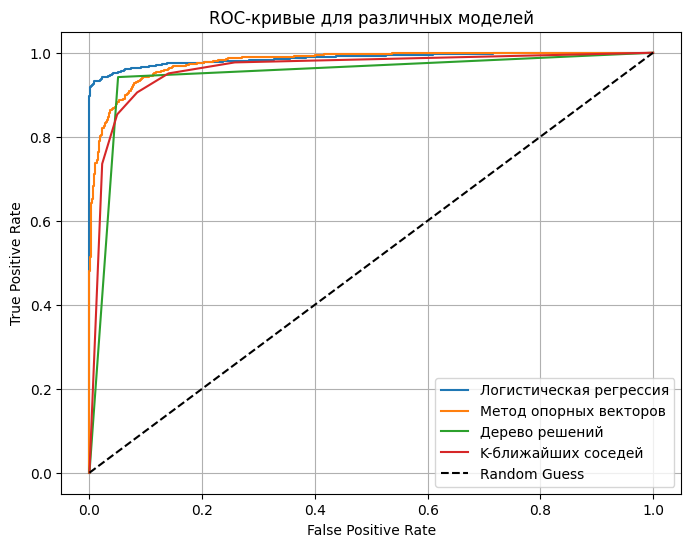

In [13]:
fpr_lr, tpr_lr, _ = roc_curve(y_valid, model_c100.predict_proba(x_valid)[:, 1])
fpr_svc, tpr_svc, _ = roc_curve(y_valid, model_SVC.decision_function(x_valid))
fpr_tree, tpr_tree, _ = roc_curve(y_valid, tree_model.predict_proba(x_valid)[:, 1])
fpr_knn, tpr_knn, _ = roc_curve(y_valid, knn_model.predict_proba(x_valid)[:, 1])

# Визуализируем ROC-кривые
plt.figure(figsize=(8, 6))
plt.plot(fpr_lr, tpr_lr, label='Логистическая регрессия')
plt.plot(fpr_svc, tpr_svc, label='Метод опорных векторов')
plt.plot(fpr_tree, tpr_tree, label='Дерево решений')
plt.plot(fpr_knn, tpr_knn, label='K-ближайших соседей')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривые для различных моделей')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()